Aryan Dusi Kameshwara| 852319 | Project ML implmentation

#1. Data Loading and processing

Using the datset  with cars that have 'not specified' amount of owners completely removed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Dataset including cars that dont have a speficied amount of owners
#df = pd.read_csv('/content/scrapedCars5.csv')

#Dataset only including cars that have a speficied amount of owners
df = pd.read_csv('/content/Scraped carsW.csv')

#Removing the commas from the mileage and price columns and float Conversion
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Mileage(Miles)'] = df['Mileage(Miles)'].str.replace(',', '').astype(float)

#splitting the dataset into labels and data
data = df.drop('Price',axis=1)
labels = df['Price']


print("Car Data:")
print(data)
print(" ")
print("Car Labels (price)::")
print(labels)

#saving the original dataset in train test form , with same random split as 
#processed data to plot feature graphs
data_train,data_test,label_train,label_test = train_test_split(data,labels,train_size=0.8, random_state= 34)

Car Data:
           Make     Model  Reg-Year Configuration  Mileage(Miles)  \
0       Citroen        C3      2018           SUV         30718.0   
1          Ford     Focus      2006     Hatchback         81000.0   
2      Vauxhall     Astra      2010     Hatchback        110000.0   
3      Vauxhall     Astra      2010     Hatchback        160000.0   
4       Renault      Clio      2011     Hatchback        147000.0   
...         ...       ...       ...           ...             ...   
28213      Jeep   Compass      2018           SUV         36474.0   
28214      Jeep  Renegade      2017           SUV         40709.0   
28215      Jeep  Renegade      2017           SUV         60525.0   
28216      Jeep  Wrangler      2018           SUV         21000.0   
28217      Jeep  Renegade      2017           SUV         35000.0   

       EngSize(Litres)  Power(BHP)    Control Fuel-Type  Owners  
0                  1.2          82     Manual    Petrol       1  
1                  1.6       

#2.Hot Encoding the dataset

Implementing a Hot encoder For the dataset to convert the categorical variables to numerical ones so it can be provided to the required ML algorithm as full numerical data


In [ ]:
#One hot whole Dataset to keep dimensionality Consistent
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(data)
data = enc.transform(data).toarray()
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#3.Scaling and splitting the dataset

Scaling the dataset and then splittong it into a train test data:

-Creating a Scalar object to give every column in our data a mean of zero and a variance of 1 

-To obtain scaled data that is close to zero
(This reduces the distance between each of the data points - hence minimising the sensitivty of the model used)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = data
y = labels

x = scaler.fit_transform(x)
print("Scaled Dataset:")
print(x)

#80:20 split -> train/test
X_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state= 34)
#random state so we get the same partition each run of the dataset to ensure consistency

Scaled Dataset:
[[-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]
 [-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]
 [-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]
 ...
 [-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]
 [-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]
 [-0.14112201 -0.14486407 -0.01974776 ... -0.01575215 -0.01190687
  -0.00595312]]


#4.Regression: using logistic regression and gradient boosting to make predictions based on the scraped dataset



Training a logistic regression model with the training data
and then using the model to predict the test dataset 

In [ ]:
small_train,small_test,smally_train,smally_test = train_test_split(x,y,train_size=0.4, random_state= 22)
#redusing the dataset to about 4-% since logistic regression takes up too much memory
#and using 20,000 plus models will crash it
lin_train,lin_test,liny_train,liny_test = train_test_split(small_train,smally_train,train_size=0.8, random_state= 34)
#making the train load lower so the log reg doesn't crash
print(len(lin_train))
#9000 models being trained 

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
lr = LogisticRegression(random_state= 0,max_iter = 20) #try lower amount of iterations and change doc
lr.fit(lin_train,liny_train)

9029


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=20, random_state=0)

In [ ]:
preds = lr.predict(lin_test)
print(preds)

[15300.  6495. 20990. ...  2500.  3499.  4280.]


In [ ]:
linear_loss = np.sqrt(mean_squared_error(liny_test,preds))
print("Log Regression Root Mean Squared Error:", linear_loss)

Log Regression Root Mean Squared Error: 16442.86254297513


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds,liny_test)

4966.77015057573

In [ ]:
r2_score(preds,liny_test)

0.7494538504753927

Text(0, 0.5, 'Predicted Price')

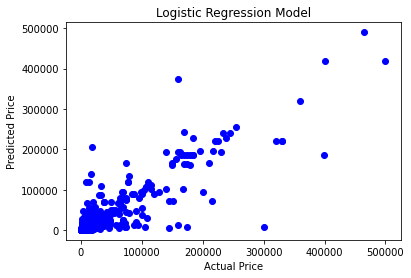

In [ ]:
plt.figure()
plt.scatter(liny_test,preds, c='blue')
plt.title('Logistic Regression Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

#5.Training a Gradient Boosting Model to attempt to improve the performance of the regressor

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score
#boosting type-> a gradient boosting decision tree
#number of leaves for each tree
#number of estimators to use
#L2 regulatisation, (acts like a force that removes a small percentage of weights at each iteration)
gb_model = lgb.LGBMRegressor(boosting_type= 'gbdt',num_leaves = 34, n_estimators = 800,reg_lambda=1.0)
#800,100
gb_model.fit(X_train,y_train)
gb_predictions = gb_model.predict(x_test)

Metrics for Gradient Boosted model

In [ ]:
gb_loss = np.sqrt(mean_squared_error(y_test,gb_predictions))
print("Gradient Boosted Model's Root Mean Sqaured Error",gb_loss)
#the gradient boosted model's RMSE is a lot smaller

Gradient Boosted Model's Root Mean Sqaured Error 6283.784841268248


Printing the R^2 score for thr GB model (variance of predictiability from the indepandant variable)

In [ ]:
from sklearn.metrics import r2_score
print("Gradient Boosted R^2 score:")
r2_score(y_test,gb_predictions)

Gradient Boosted R^2 score:


0.9598396176598132

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,gb_predictions)

2898.1604486158644

#***Scatter plots of  GB  Model***


From an optimal plot we would want to see a postive correlation between the predicited price and the actual price. To show that the model is correctly identifying a trend in the prices and is able to generally distinguish cars that have higher car prices from lower cars that have lower car prices

Text(0, 0.5, 'predicted Price')

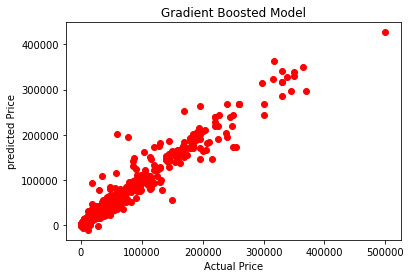

In [ ]:
plt.scatter(y_test,gb_predictions, c='red')
plt.title('Gradient Boosted Model')
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
#nice diagonal patteren
#showing that there is a correlation between the predicted and actual values
#ideally it will be a line that ressembles Y = X, since pred=actual
#but, of course, car prices can be all over the place

Test dataset's Characteristics vs their Predicted Price

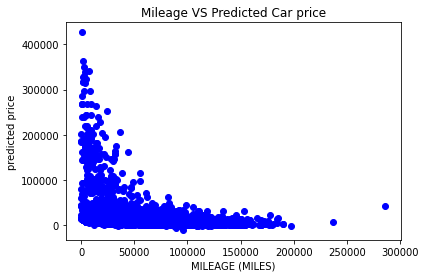

In [ ]:
plt.title('Mileage VS Predicted Car price')
plt.xlabel('MILEAGE (MILES)')
plt.ylabel('predicted price')
plt.scatter(data_test['Mileage(Miles)'],gb_predictions, c='blue')

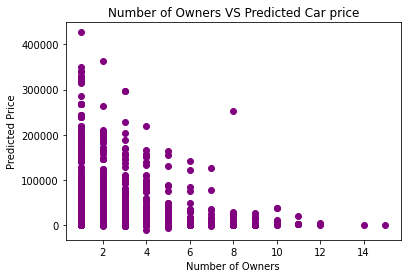

In [ ]:
plt.title('Number of Owners VS Predicted Car price')
plt.xlabel('Number of Owners')
plt.ylabel('Predicted Price')
plt.scatter(data_test['Owners'],gb_predictions, c='purple')

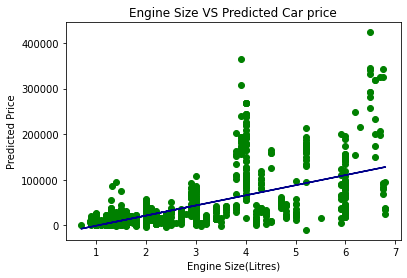

In [ ]:
plt.title('Engine Size VS Predicted Car price')
plt.xlabel('Engine Size(Litres)')
plt.ylabel('Predicted Price')
plt.scatter(data_test['EngSize(Litres)'],gb_predictions, c='green')
m, b = np.polyfit(data_test['EngSize(Litres)'],gb_predictions, 1)
plt.plot(data_test['EngSize(Litres)'], m*data_test['EngSize(Litres)'] + b,c='darkblue')

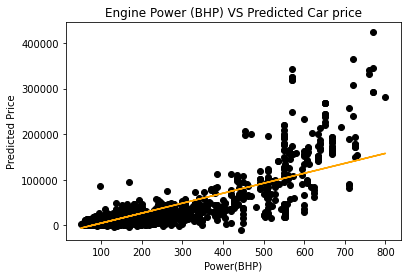

In [ ]:
plt.title('Engine Power (BHP) VS Predicted Car price')
plt.xlabel('Power(BHP)')
plt.ylabel('Predicted Price')
plt.scatter(data_test['Power(BHP)'],gb_predictions, c='black')
m, b = np.polyfit(data_test['Power(BHP)'],gb_predictions, 1)
plt.plot(data_test['Power(BHP)'], m*data_test['Power(BHP)'] + b,c='orange')

#Testing the GB Model using Test data

In [ ]:
#mercedes benz from website worth 16,500
testDT = pd.read_excel('/content/SmallTestDT.xlsx')
testDT = enc.transform(testDT).toarray()
value = gb_model.predict(testDT)
print(float(value))
#the model shines in the range of predicting cars that are worth about 
#0-40,000, this is becuase there is more data for those models in the dataset
#and on the web

16215.156569045632


Test interface to enter car models to predict

In [ ]:
#For new cars set mileage and owners to 0
Make = input("Enter car make (brand) (e.g. Ford): ")
Model = input("Enter model name (e.g. Focus): ")
RegYear = input("Enter Registration year (e.g. 2018): ")
Configuration = input("Enter Car Configuration (e.g. Saloon/Hatchback/SUV/Coupe): ")
Mileage = input("Enter desired car mileage (e.g. 21000): ")
Engine_size = input("Enter Engine Size-Litres: (usually 0-4): ")
Engine_power = input("Enter Engine Power-BHP: (usually 0-500): ")
Control = input("Enter Control-Type: (Automatic/Manual): ")
Fuel_type = input("Enter Fuel type: (Diesel/Petrol): " )
Owners = input("Enter number of Owners: (e.g. 2): " )

dfTestInput = pd.DataFrame(columns=["Make", "Model", "Reg-Year", "Configuration", "Mileage(Miles)", "EngSize(Litres)", "Power(BHP)","Control", "Fuel-Type", "Owners"])
testRow = [Make,Model,RegYear,Configuration,Mileage,Engine_size,Engine_power,Control,Fuel_type,Owners]
dfTestInput.loc[len(testRow)] = testRow
dfTestInput = enc.transform(dfTestInput).toarray()
val = gb_model.predict(dfTestInput)
predictedPrice = round(float(val))
print("The predicted price for this model is: £",predictedPrice)


Enter car make (brand) (e.g. Ford): Audi
Enter model name (e.g. Focus): A1
Enter Registration year (e.g. 2018): 2020
Enter Car Configuration (e.g. Saloon/Hatchback/SUV/Coupe): Hatchback
Enter desired car mileage (e.g. 21000): 10000
Enter Engine Size-Litres: (usually 0-4): 1.6
Enter Engine Power-BHP: (usually 0-500): 170
Enter Control-Type: (Automatic/Manual): Automatic
Enter Fuel type: (Diesel/Petrol): Petrol
Enter number of Owners: (e.g. 2): 1
The predicted price for this model is: £ 32146


Downsides of model:
1.   Weaker at predicting luxury cars as there is less autotrader listings for cars above 100k
2.   not compatible with electric cars





#6.CNN
implmentation of a classifier to compare



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
X_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.95, random_state= 34)
print(X_train.shape)
#number of features= 11661 = 69*13*13 or 169 69 13
#X_train.resize(22574,69,13,13)
X_train.resize(26807,69,13,13)
x_test.resize(1411,69,13,13)

print(X_train.shape)
#normalising the data
x_train = X_train/255
x_test = x_test/255


#creating the model:
model = Sequential()
model.add(Conv2D(input_shape=(69,13,13),kernel_size=(2,2), filters=256,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(input_shape=(69,13,13),kernel_size=(2,2), filters=128,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


#flattening the data
model.add(Flatten())

#the output classes
model.add(Dense(16,activation='relu'))
model.add(Dense(559000,activation='softmax'))

model.summary()

model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=120,validation_split = 0.2, verbose = 1)
#history = model.fit(x_train, y_train, epochs=90, validation_split=0.2, verbose=1)


(26807, 11661)
(26807, 69, 13, 13)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 12, 256)       13568     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 6, 256)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 34, 6, 256)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 5, 128)        131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 2, 128)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout) 

45/45 [==============================] - 8s 171ms/step - loss: 14.4744 - accuracy: 0.2431


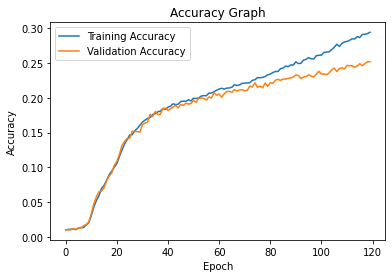

In [ ]:
model.evaluate(x_test,y_test)

# #accuracy curve for training data
# plt.plot(history.history['accuracy'])
# plt.title("Accuracy")
# plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend(['Training Accuracy',
           'Validation Accuracy'])

The CNN is not an optimal model, it required a lot of fine tuning and the validation accuracy levels out at around 30% after a certain amount of epochs.

Also the CNN classifies each car model to an already existing price, it is more suited to classifications where there are a finite amount of solutions and each solution is known. 

This is becuase 'Price' as a label is a continous variable (float), it can't predict it as well. There are no finite amout of answers. Using a regressor is better in this case since it can extrapolate data based on the data it has already seen and give a valid prediction